In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import os


In [2]:
data=[]
element =[0,[0]]
logdir = 'logfiles'
filename = 'nolomits_P300I10D100'
plotdir = os.getcwd()+'/plots'


currplot = os.path.join(plotdir, filename)
os.mkdir(currplot)

with open(logdir+'/'+filename) as f:
    line = f.readline()
    while line:
        if (line.find("1") == 0):
            element[0]=int(line.strip())
            line = f.readline()
            if (line.find("[") == 0):
                stripped_line = line[1:].strip()
                line = f.readline()
                while (line.find("]") == -1):
                    stripped_line += " "+line.strip()
                    line = f.readline()
                if (line.find("]") > 0):
                    stripped_line += " "+line[:-2].strip()
                    element[1] = [float(k) for k in stripped_line.split()]
                    data.append(element.copy())
                    line = f.readline()
            
                

In [3]:
currplot

'/home/flo/Roboy/mujoco_roboy/eval_data/plots/nolomits_P300I10D100'

In [4]:
datanr = len(data)
tendonnr = len(data[1][1])

In [5]:
#first nonzero element
startindices = []
for t in range(tendonnr):
    startindices.append(next((i for i, x in enumerate([n[1][t] for n in data]) if x), None))

Not_none_values = filter(None.__ne__, startindices)
startindices = list(Not_none_values)


In [6]:
#start at specific index?
startindex = min(startindices)
#start some indices before?
endindex = datanr

plotdata = data[startindex:endindex]

plotdatanr = len(plotdata)

print("Data Points: %i \nTendons: %i" % (plotdatanr,tendonnr))
print("Plot Data starts at %i and ends at %i" % (startindex,endindex))


Data Points: 1922 
Tendons: 37
Plot Data starts at 287 and ends at 2209


In [7]:
x = [m[0] for m in plotdata]



#start x axis with 0
tmin = min([m[0] for m in plotdata])

x = [t - x[0] for t in x]
x = [e*1e-9 for e in x]

startsec = int(x[0])
endsec = int(x[-1])


#x is in seconds now


In [8]:
shoulder_idx=[0,1,2,3,4,5,6,7]
#biceps 17 triceps 16

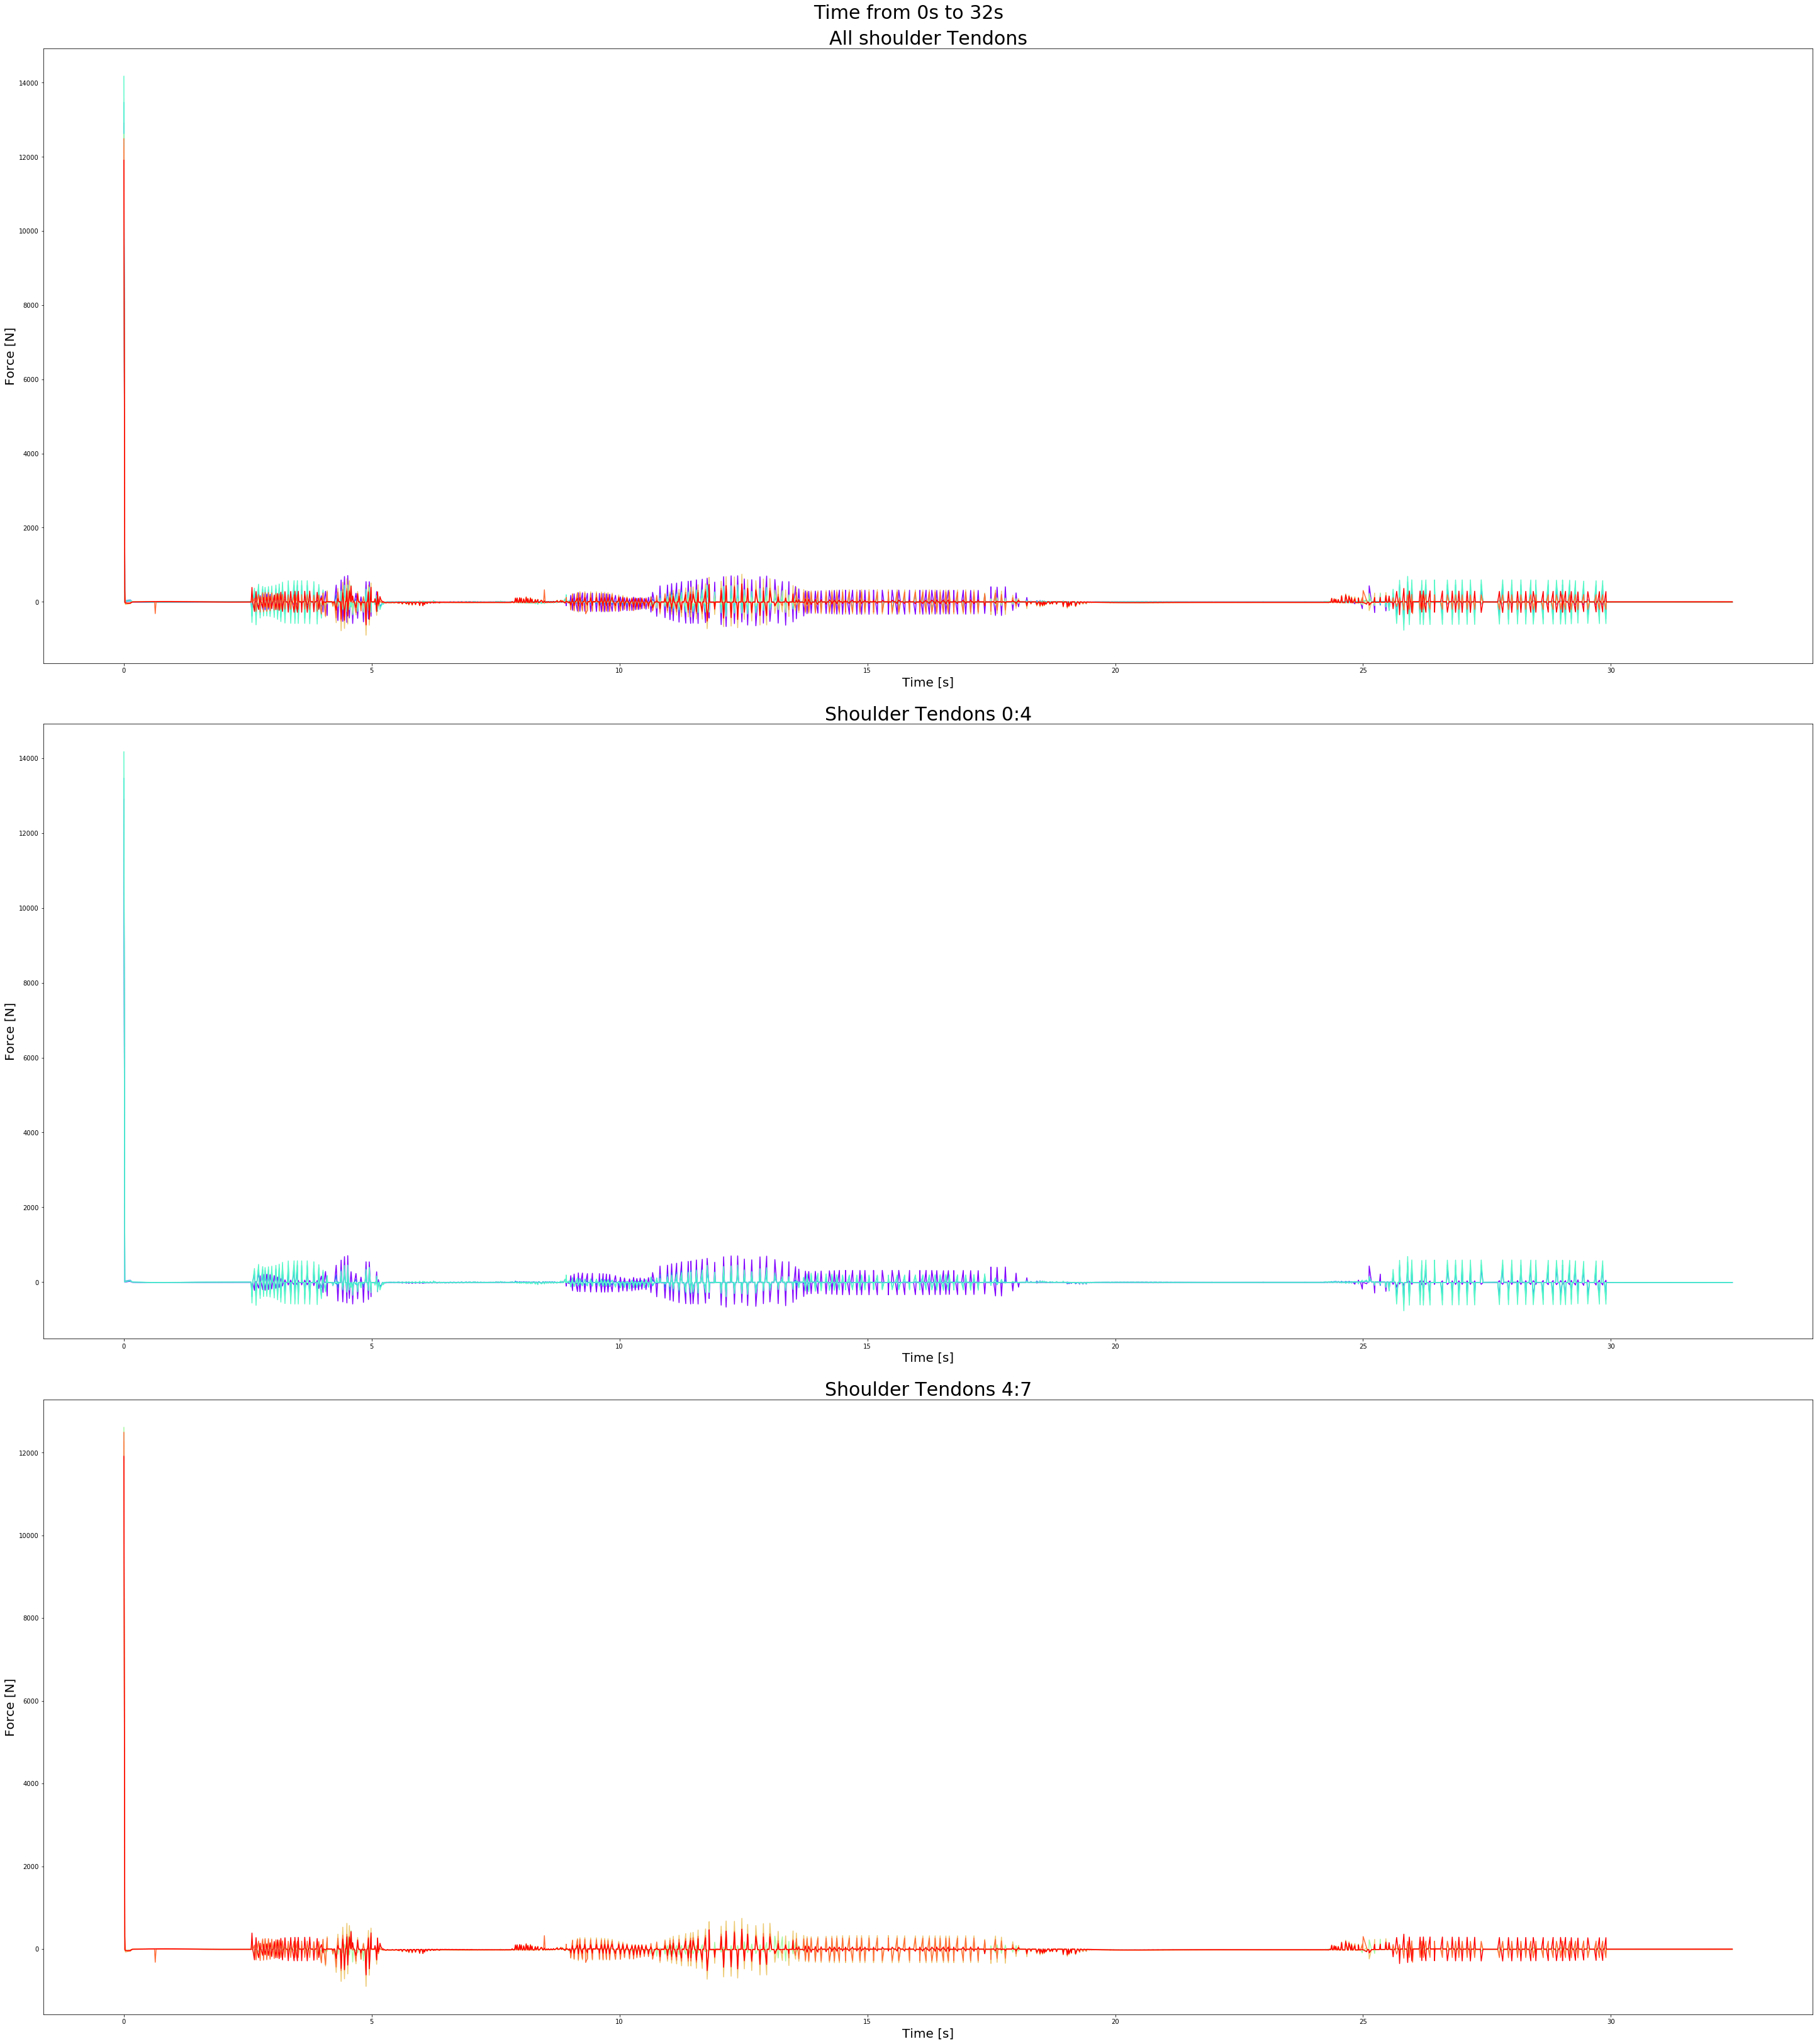

In [9]:
shoulder_colors = cm.rainbow(np.linspace(0, 1, len(shoulder_idx)))

fig_shoulder, axs_shoulder = plt.subplots(3, constrained_layout=True)
fig_shoulder.set_size_inches(40, 15*3)
for u in shoulder_idx:
    axs_shoulder[0].plot(x,[n[1][u] for n in plotdata], color=shoulder_colors[shoulder_idx.index(u)])
    
for u in shoulder_idx[:4]:
    axs_shoulder[1].plot(x,[n[1][u] for n in plotdata], color=shoulder_colors[shoulder_idx.index(u)])
    
for u in shoulder_idx[4:]:
    axs_shoulder[2].plot(x,[n[1][u] for n in plotdata], color=shoulder_colors[shoulder_idx.index(u)])

axs_shoulder[0].set_title('All shoulder Tendons', fontsize = 30)
axs_shoulder[1].set_title('Shoulder Tendons 0:4', fontsize = 30)
axs_shoulder[2].set_title('Shoulder Tendons 4:7', fontsize = 30)

for a in axs_shoulder:
    a.set_xlabel('Time [s]', fontsize=20)
    a.set_ylabel('Force [N]', fontsize=20)

fig_shoulder.suptitle('Time from %ss to %ss' % (startsec, endsec), fontsize = 30)
    
fig_shoulder.savefig(currplot+'/shoulder_%s_s%se%s.png' %(filename, startsec, endsec) , dpi = 100)

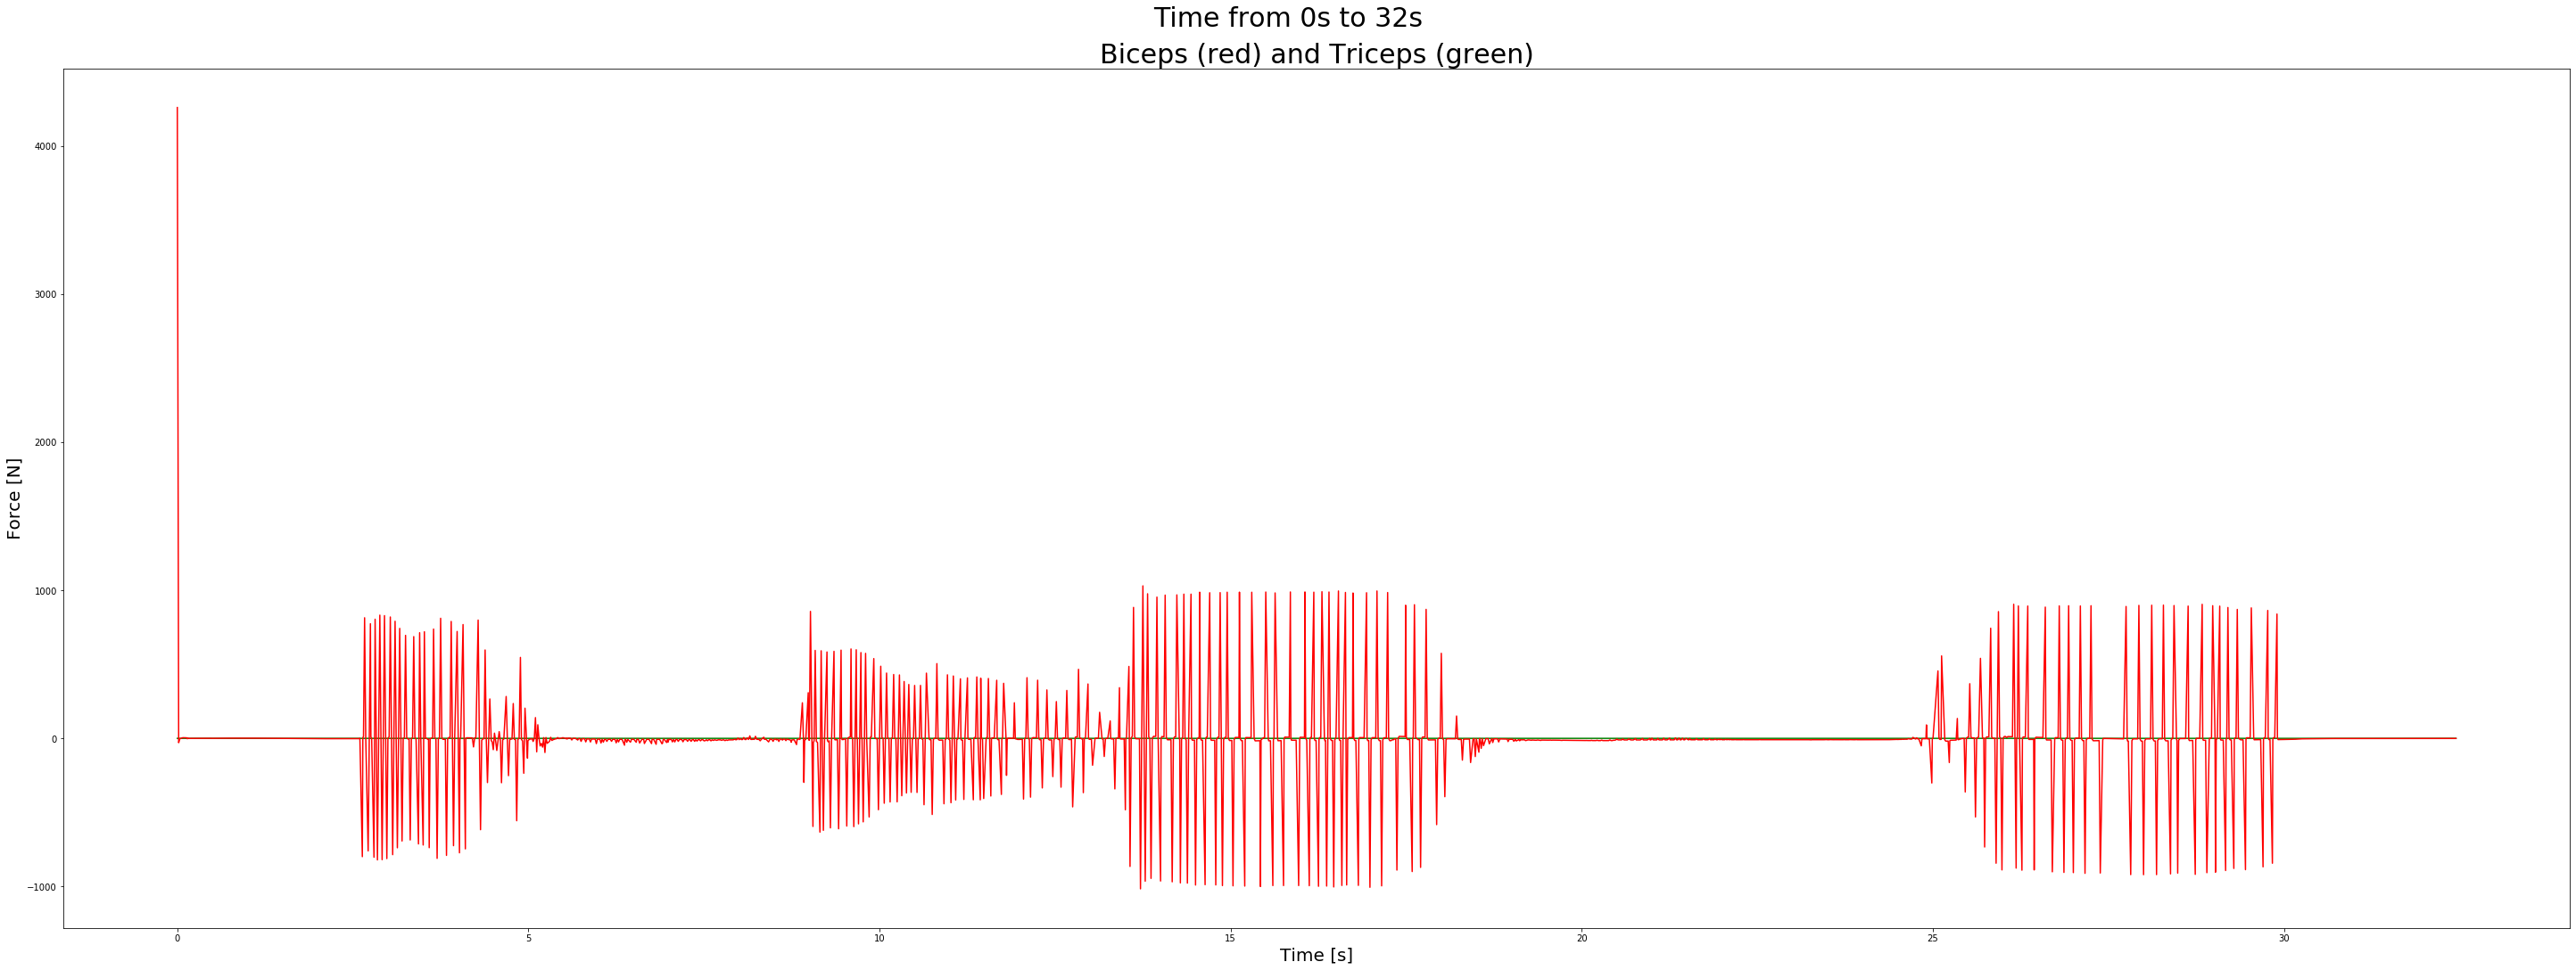

In [10]:
fig_cepses, axs_cepses = plt.subplots(1, constrained_layout=True)

fig_cepses.set_size_inches(40, 15)

axs_cepses.plot(x,[n[1][16] for n in plotdata], color='green')
axs_cepses.plot(x,[n[1][17] for n in plotdata], color='red')

axs_cepses.set_title('Biceps (red) and Triceps (green)', fontsize = 30)
axs_cepses.set_xlabel('Time [s]', fontsize=20)
axs_cepses.set_ylabel('Force [N]', fontsize=20)

fig_cepses.suptitle('Time from %ss to %ss' % (startsec, endsec), fontsize = 30)

fig_cepses.savefig(currplot+'/cepses_%s_s%se%s.png' %(filename, startsec, endsec) , dpi = 100)

In [11]:
# was to plot whole data. Now plots of relevant data follow

In [12]:
startsec = 12
endsec = 15

startindex = next(z[0] for z in enumerate(x) if z[1] > startsec)
endindex = next(z[0] for z in enumerate(x) if z[1] > endsec)

In [13]:
plotdata = data[startindex:endindex]
x = x[startindex:endindex]

plotdatanr = len(plotdata)

print("Data Points: %i \nTendons: %i" % (plotdatanr,tendonnr))
print("Plot Data starts at %i and ends at %i" % (startindex,endindex))

Data Points: 178 
Tendons: 37
Plot Data starts at 708 and ends at 886


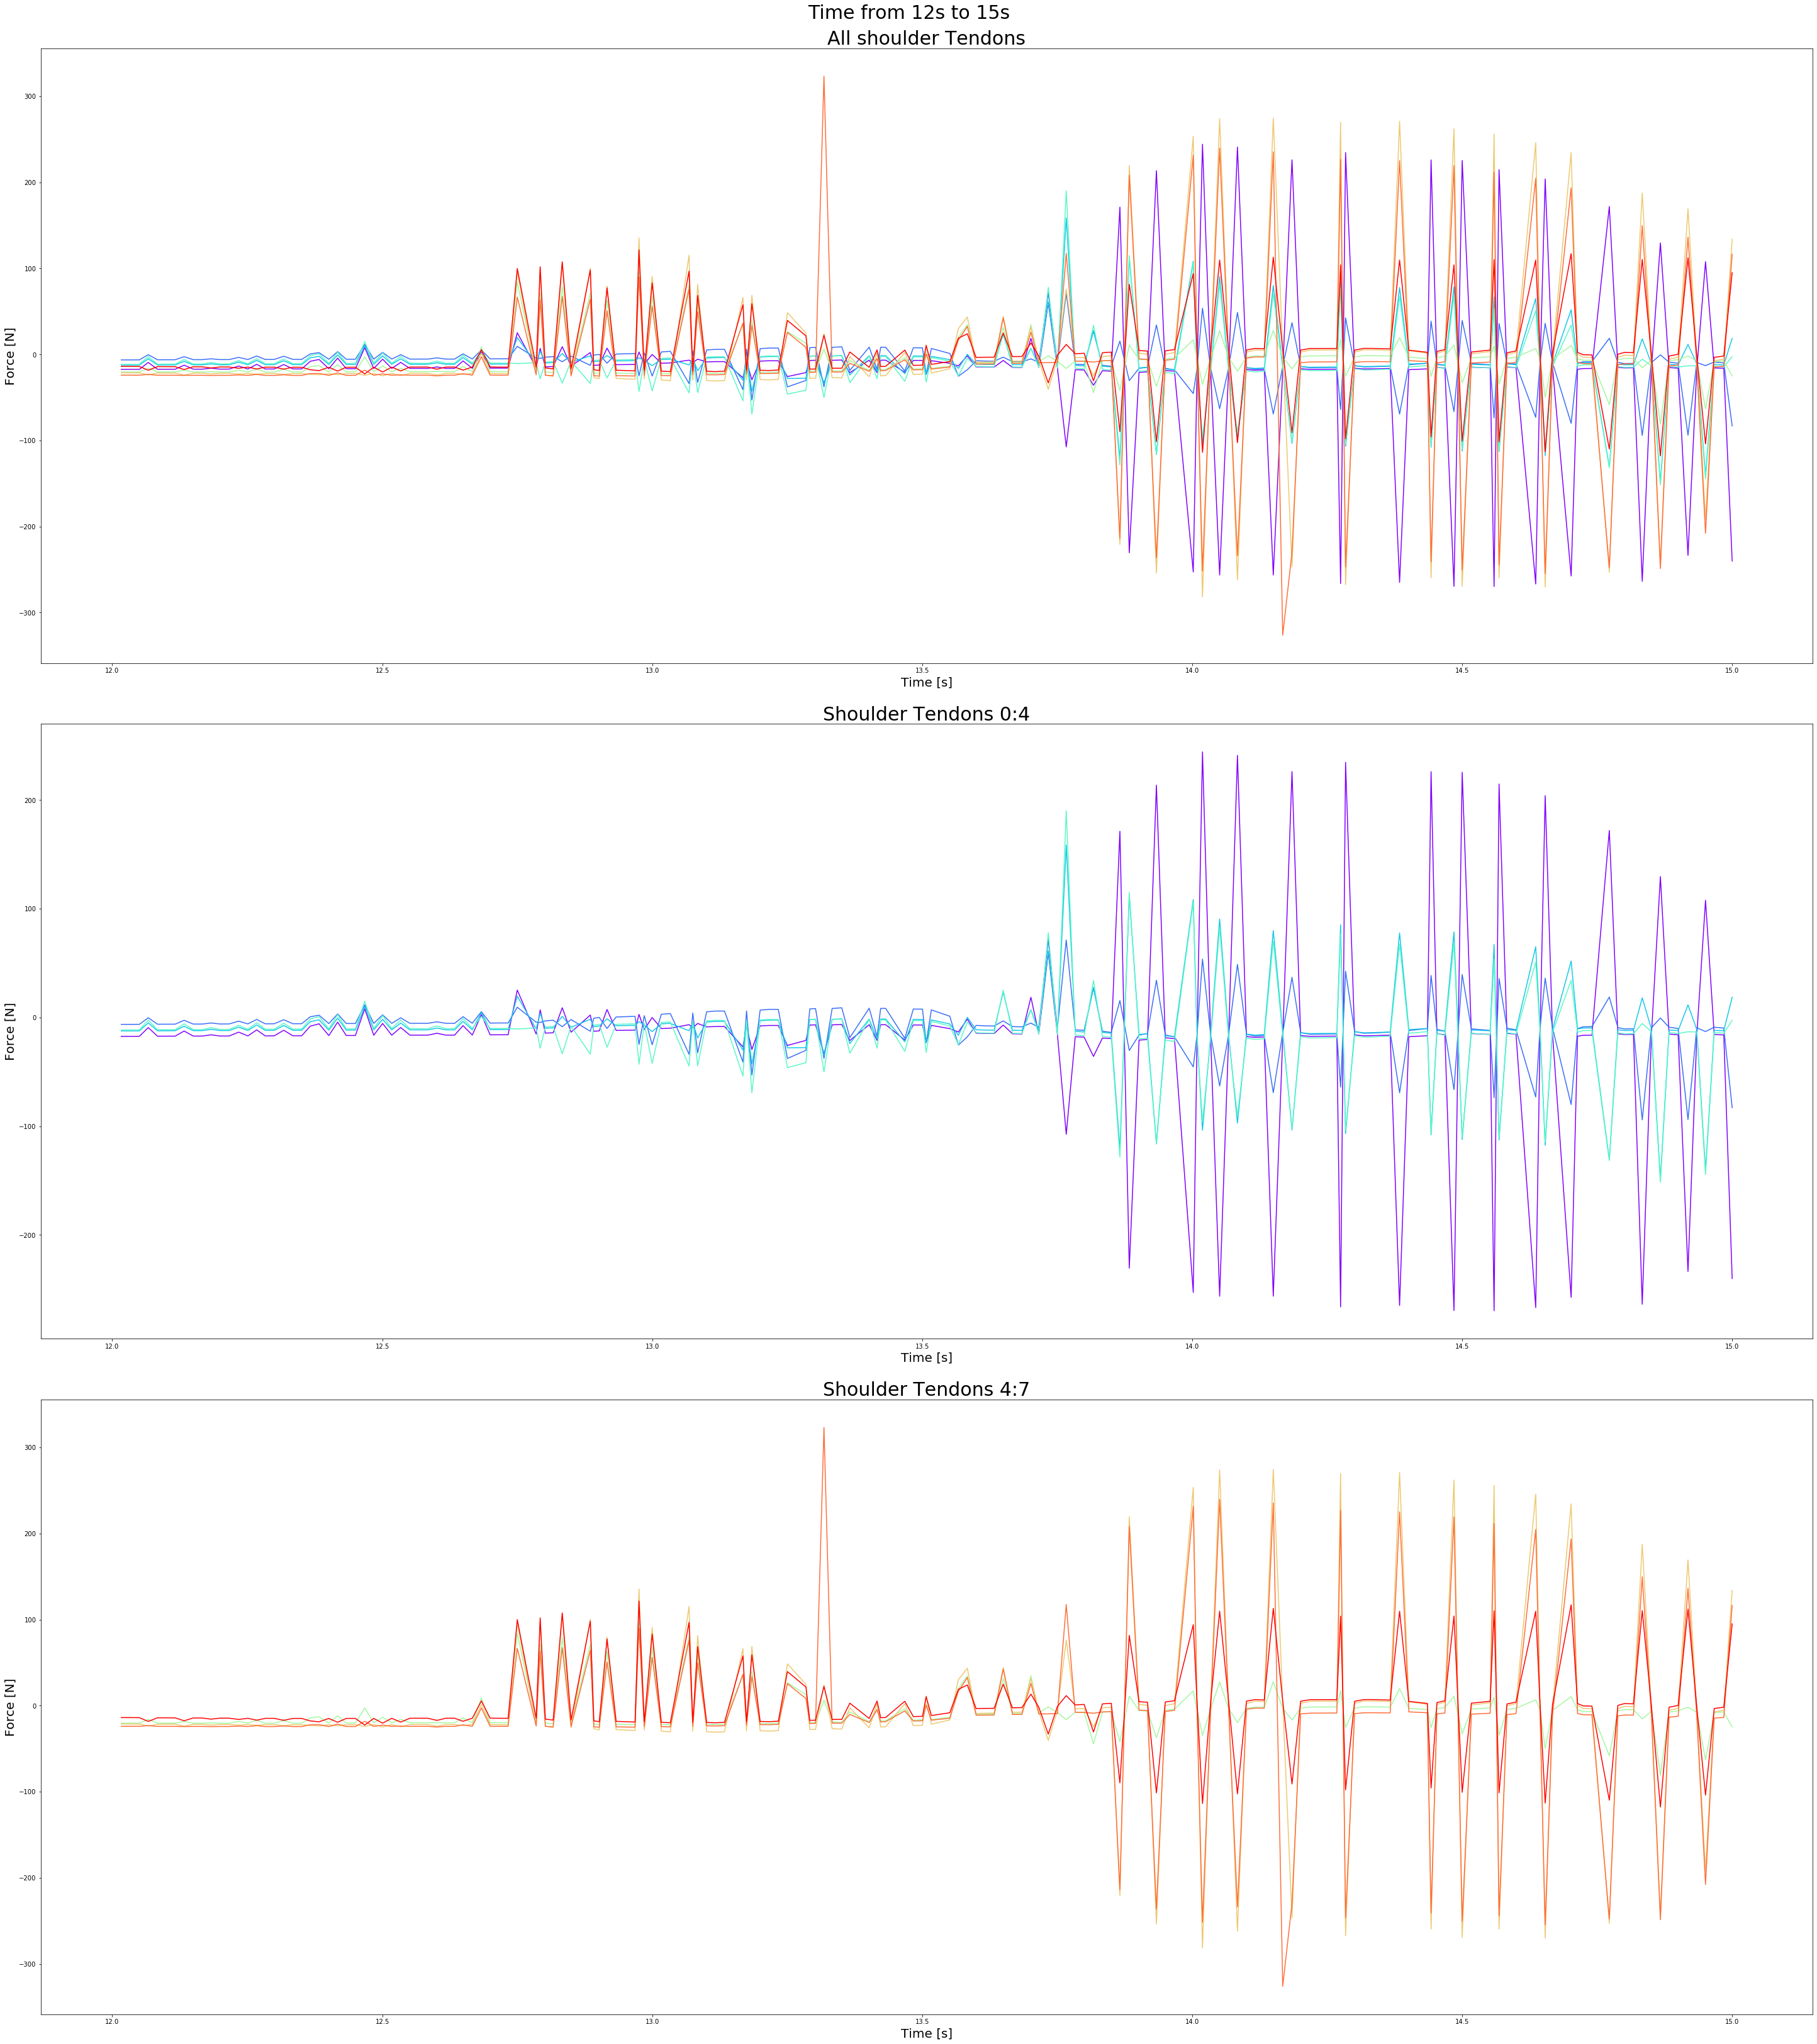

In [14]:
shoulder_colors = cm.rainbow(np.linspace(0, 1, len(shoulder_idx)))

fig_shoulder, axs_shoulder = plt.subplots(3, constrained_layout=True)
fig_shoulder.set_size_inches(40, 15*3)
for u in shoulder_idx:
    axs_shoulder[0].plot(x,[n[1][u] for n in plotdata], color=shoulder_colors[shoulder_idx.index(u)])
    
for u in shoulder_idx[:4]:
    axs_shoulder[1].plot(x,[n[1][u] for n in plotdata], color=shoulder_colors[shoulder_idx.index(u)])
    
for u in shoulder_idx[4:]:
    axs_shoulder[2].plot(x,[n[1][u] for n in plotdata], color=shoulder_colors[shoulder_idx.index(u)])

axs_shoulder[0].set_title('All shoulder Tendons', fontsize = 30)
axs_shoulder[1].set_title('Shoulder Tendons 0:4', fontsize = 30)
axs_shoulder[2].set_title('Shoulder Tendons 4:7', fontsize = 30)

for a in axs_shoulder:
    a.set_xlabel('Time [s]', fontsize=20)
    a.set_ylabel('Force [N]', fontsize=20)

fig_shoulder.suptitle('Time from %ss to %ss' % (startsec, endsec), fontsize = 30)
    
fig_shoulder.savefig(currplot+'/shoulder_%s_s%se%s.png' %(filename, startsec, endsec) , dpi = 100)

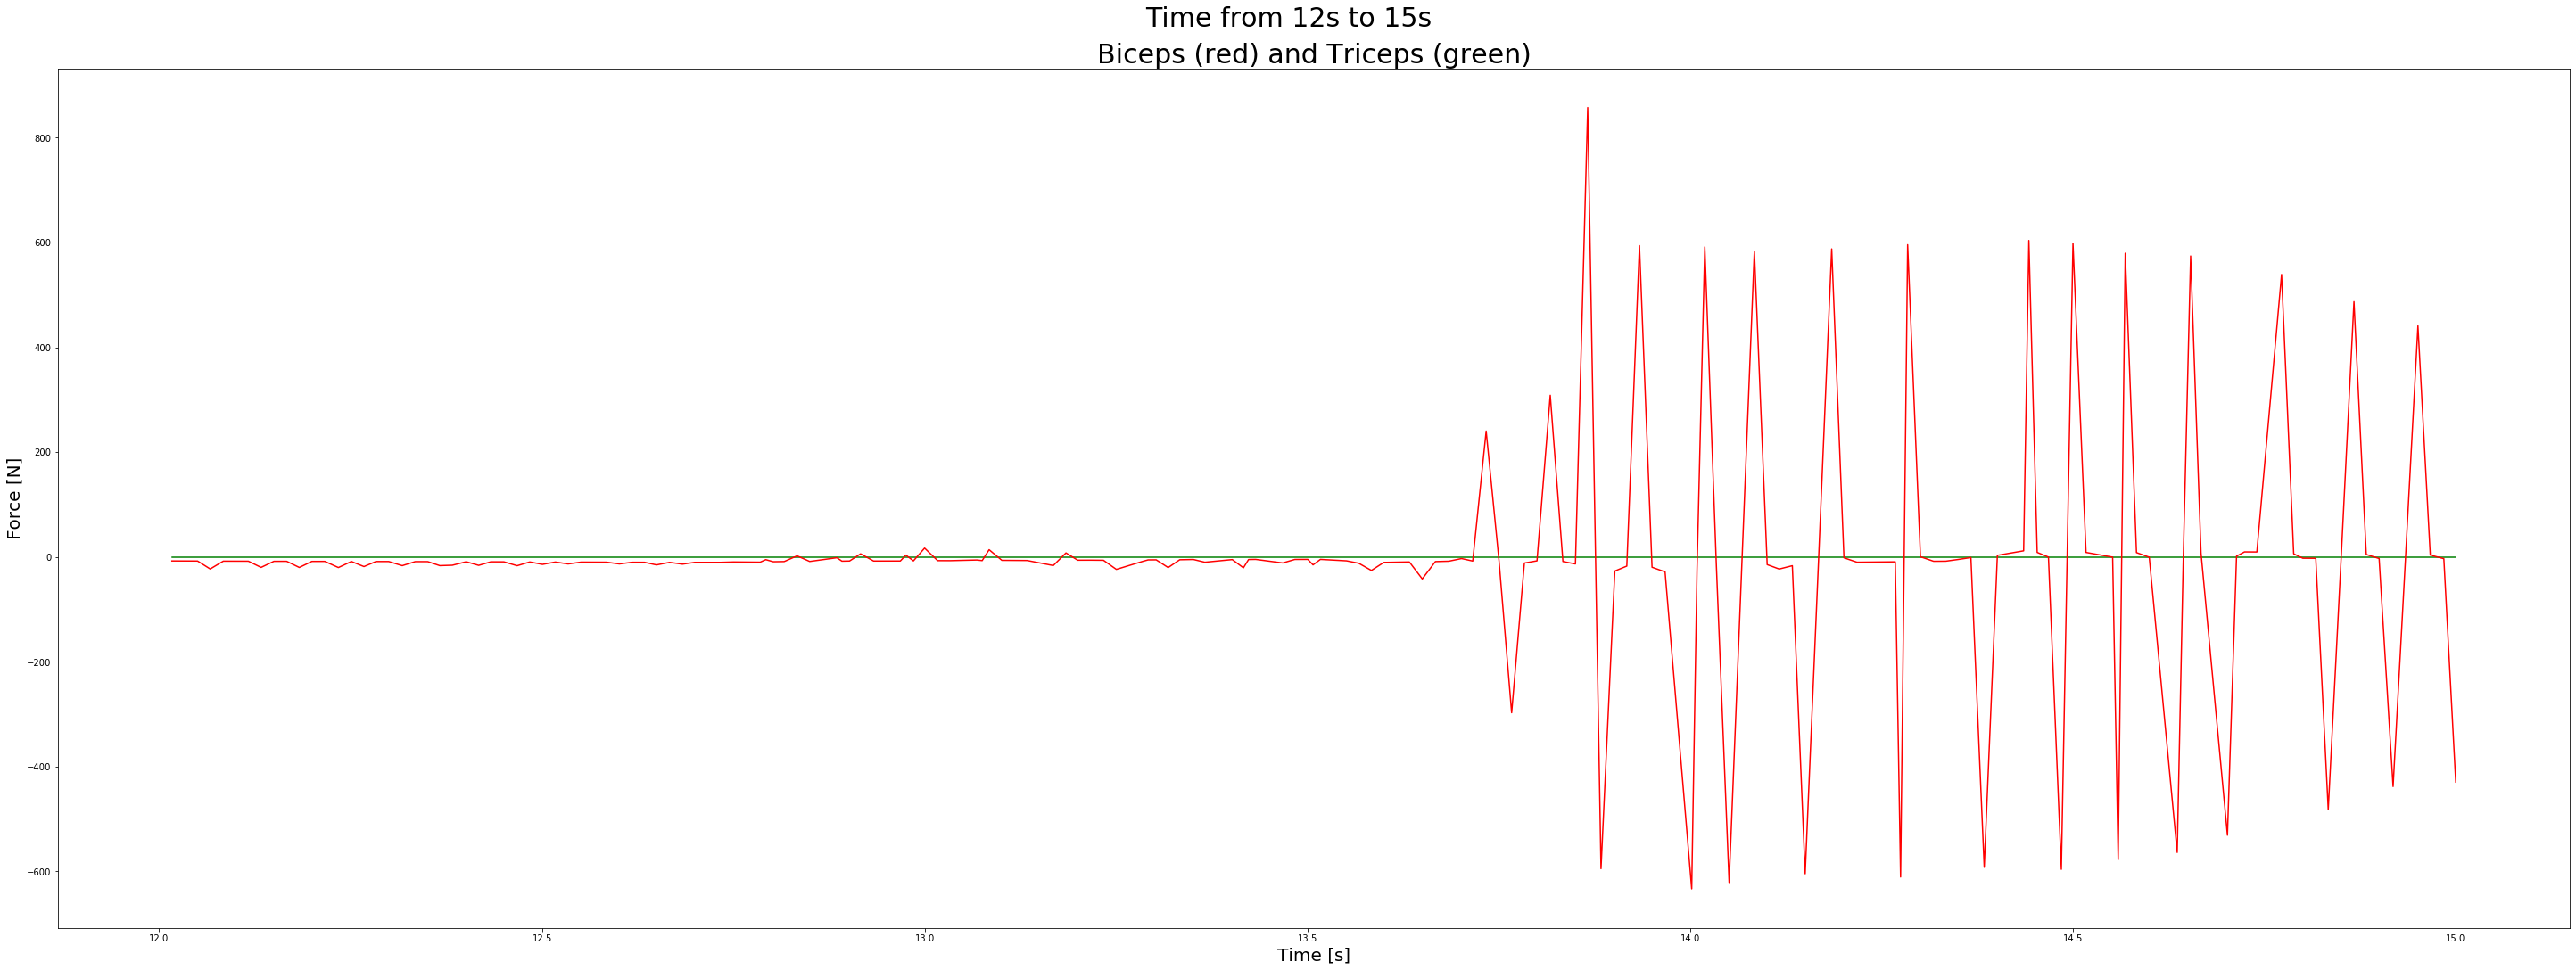

In [15]:
fig_cepses, axs_cepses = plt.subplots(1, constrained_layout=True)

fig_cepses.set_size_inches(40, 15)

axs_cepses.plot(x,[n[1][16] for n in plotdata], color='green')
axs_cepses.plot(x,[n[1][17] for n in plotdata], color='red')

axs_cepses.set_title('Biceps (red) and Triceps (green)', fontsize = 30)
axs_cepses.set_xlabel('Time [s]', fontsize=20)
axs_cepses.set_ylabel('Force [N]', fontsize=20)

fig_cepses.suptitle('Time from %ss to %ss' % (startsec, endsec), fontsize = 30)

fig_cepses.savefig(currplot+'/cepses_%s_s%se%s.png' %(filename, startsec, endsec) , dpi = 100)